In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rexpi

# Estimates for frequency w or degree n to attain a certain error level

## choose a frequency w for given degree n and error objective

In [2]:
n = 12
tol = 1e-6
w, infoest = rexpi.west(n,tol,info=1)

print("for n=%d and tol=%g, our error estimate suggests w=%f"%(n,tol,w))
print("used estimate: %s"%infoest['type'])

rx, info = rexpi.brib(w = w, n = n, tolequi = 1e-3, info = 1)
print("used %d iterations, error = %.2e, deviation = %.2e"%(info['iterations'],info['err'],info['dev']))
#errcheck = list(zip(*allerr))
#xs = np.linspace(0,1,15123)
#print("(error on test nodes is %.8e)" % np.max(np.abs(rx(1j*xs)-np.exp(1j*w*xs))))


for n=12 and tol=1e-06, our error estimate suggests w=20.601360
used estimate: asym
used 6 iterations, error = 9.12e-07, deviation = 3.51e-05


### iteratively compute best approximants for given degree and error objective
- error objective is sandwiched between error of computed best approximant and lower bound with deviation
- computed approximant is close to error of error objective

In [3]:
n = 12
errob = 1e-6
tolequi=1e-12/errob
print("n = %d, error objective = %.8e, tollequi = %.2e\n"%(n,errob,tolequi))

r, success, wnew, info = rexpi.brib_err(n, errob, errsandwich=1, tolequi=tolequi)
erru = info['err']
errl = (1-info['dev'])*info['err']
print("error sandwich, suggested using w=%f"%wnew)
print("error of best approx sandwiched between %.12e and %.12e\n"%(errl,erru))

r, success, wnew, info = rexpi.brib_err(n, errob, errsandwich=0, tolequi=tolequi)
err = info['err']
errdist = abs(info['err']-errob)/info['err']
print("searching for error directly, suggested using w=%f"%wnew)
print("error of computed approx. err = %.14e, relative distance to error objective = %.2e"%(err,errdist))


n = 12, error objective = 1.00000000e-06, tollequi = 1.00e-06

error sandwich, suggested using w=20.678971
error of best approx sandwiched between 9.999998182577e-07 and 1.000000000490e-06

searching for error directly, suggested using w=20.678971
error of computed approx. err = 1.00000000123481e-06, relative distance to error objective = 1.23e-09


## choose a degree n for a given frequency w and tolerance

In [4]:
w = 16
tol = 1e-6
n, infoest = rexpi.nest(w,tol,info=1)
print("for w={} and tol={}, our error estimate suggests using n={}".format(w,tol,n))
print("used estimate: %s"%infoest['type'])

rx, info = rexpi.brib(w = w, n = n, tolequi = 1e-3, info=1)
print("degree n=%d, used %d iterations, error = %.2e, deviation = %.2e"%(n,info['iterations'],info['err'],info['dev']))

for w=16 and tol=1e-06, our error estimate suggests using n=10
used estimate: asym
degree n=10, used 6 iterations, error = 1.85e-06, deviation = 6.02e-06


## plot errors

In [5]:
N=5000
xs = np.linspace(-1,1,N)
yref = np.exp(1j*w*xs)
aprxerr = rx(1j*xs)-yref
aprxerrxmax = np.max(np.abs(aprxerr))

phaseerr = np.angle(rx(1j*xs)/yref)
phaseerrmax = max(abs(phaseerr))

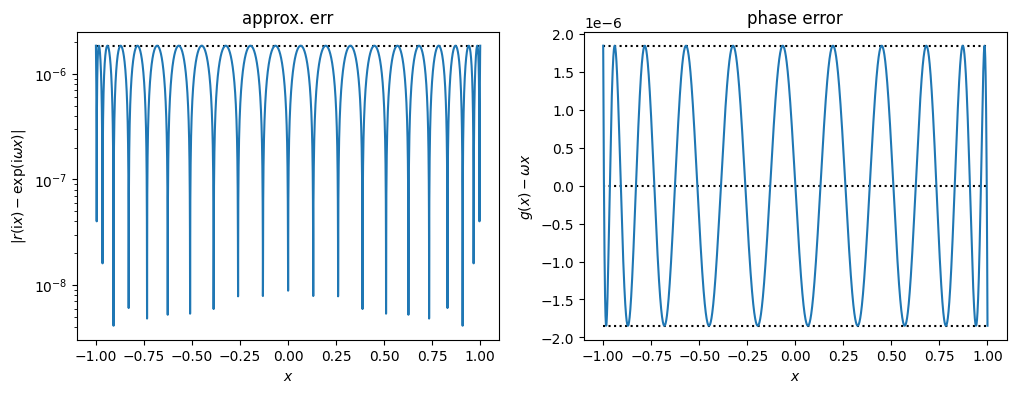

In [6]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))

ax2.plot([-1,1],[0,0],'k:',[-1,1],[phaseerrmax,phaseerrmax],'k:',[-1,1],[-phaseerrmax,-phaseerrmax],'k:')
ax2.plot(xs,phaseerr);
ax2.set_title("phase error")
ax2.set_ylabel("$g(x)-\omega x$")
ax2.set_xlabel("$x$");

ax1.semilogy([-1,1],[aprxerrxmax,aprxerrxmax],'k:')
ax1.semilogy(xs,np.abs(aprxerr));
ax1.set_title("approx. err")
ax1.set_ylabel("$|r(\mathrm{i}x)-\exp( \mathrm{i} \omega x)|$")
ax1.set_xlabel("$x$");
#plt.ylim((1e-7,4e-6))
#plt.savefig("approxerror.png")
#plt.savefig("phaseerror.png")